In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ath = pd.read_csv('attributeDifferences.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head()

,sexFirst,sportFirst,eventFirst,heightDiff,weightDiff,ageDiff
0,M,Athletics,Athletics Men's Shot Put,13.0,44.0,3.0
1,M,Athletics,Athletics Men's 400 metres,0.0,14.0,6.0
2,M,Athletics,Athletics Men's Discus Throw,3.0,23.0,2.0
3,M,Athletics,Athletics Men's Long Jump,10.0,3.0,-9.0
4,M,Athletics,Athletics Men's High Jump,3.0,0.0,12.0


In [4]:
female = ath[~ath.sexFirst.str.contains("M")]
male = ath[~ath.sexFirst.str.contains("F")]

In [5]:
topTenHeight = male.nlargest(10, ['heightDiff'])

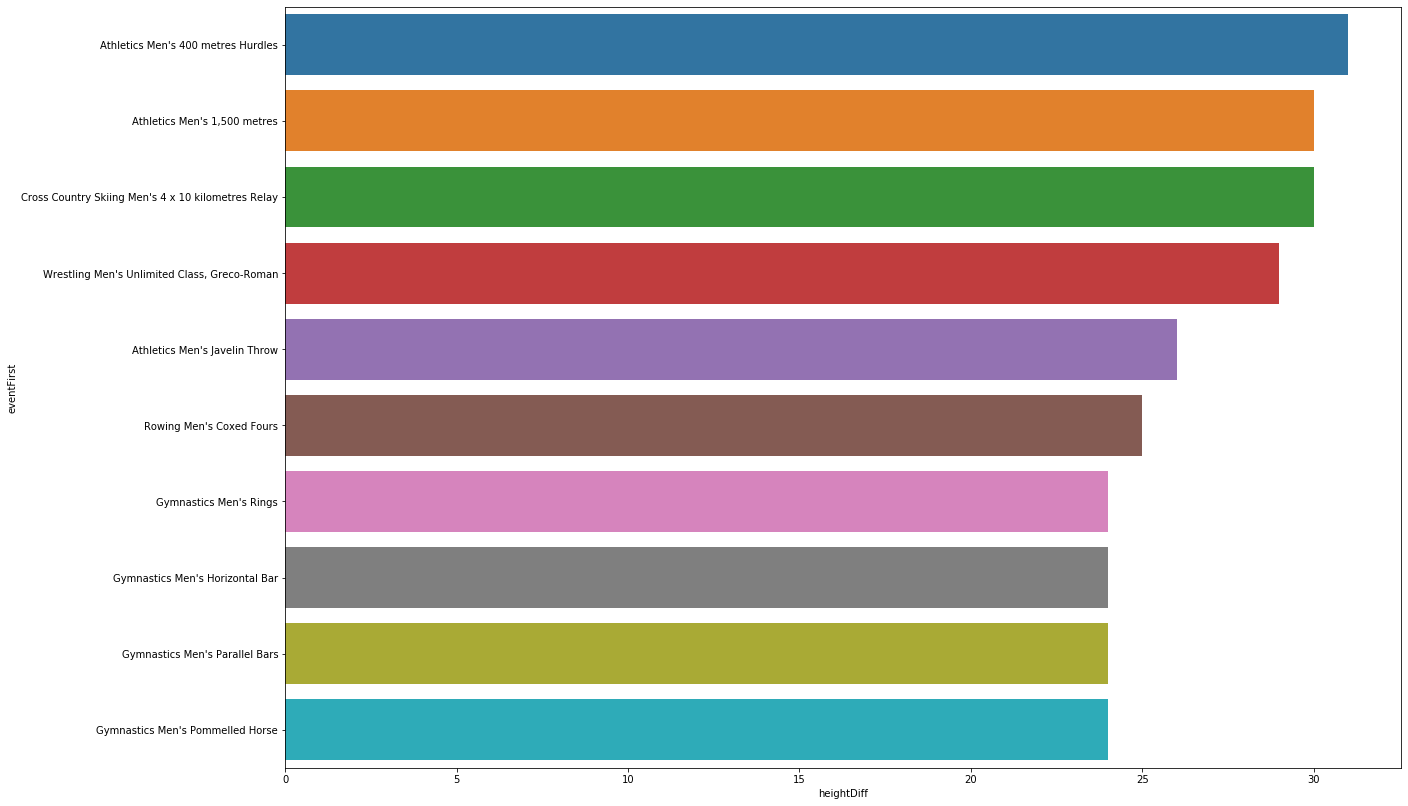

In [6]:
fig = plt.figure(figsize=(20,14))
ax = sns.barplot(y = topTenHeight['eventFirst'], x=topTenHeight['heightDiff'])
plt.show()